In [52]:
#Importing the Basic Libraries 
import pandas as pd
import numpy as np
import sklearn
import re
import html
import matplotlib.pyplot as plt

In [53]:
#opening the files
unclassified=open('unclassified_tweets.txt','r',encoding='utf8').read()
classified=open('classified_tweets.txt','r').read()
#Removing Empty lines if any
unclassified = [line for line in unclassified.splitlines() if line.strip()!='']
classified = [line for line in classified.splitlines() if line.strip()!='']

## Q1 Data Cleaning 

In [54]:

def clean(up):
     # Convert to lowercase.
    up = up.lower()    
   
    # Remove URLs
    up = re.sub(r"http\S+", "", up)
    up = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','', up)
    up = re.sub('(www\.[^\s]+)|(.net[^\s]+)|(instagram.[^\s]+)|(facebook.[^\s]+)|(twitter.[^\s]+)|(bit.[^\s]+)|(fb.[^\s]+|(huffington.[^\s])+|(tinyurl.[^\s]+))',' ',up)
    
    #All html tags (i.e., /<[^>]+>/) are removed.
    up = re.sub('<.*?>',' ',up)
    
    # Html character codes (i.e., &...;) are replaced with an ASCII equivalent.
    import html
    up = html.unescape(up)
    
    # Remove extra white spaces
    up = re.sub('[\s]+', " ", up)
    
    # Keep only letters
    up = re.sub("[^a-zA-Z]", " ", up)
      
    # Remove stopwords
    stopwords = open('stop_words.txt', 'r').read().split()     
    up = up.split()                     
    nstp = " ".join(w for w in up if not w in stopwords)
    up = nstp
    
    # tokenize the tweet
    clndata = up.split()

    return clndata

Example=clean('living the dream. #cameraman #camera #cameraception #camera #cameras #marriott #feet #tommulcair… instagram.com/p/8up9qepkxw/ ')
print(Example)

['living', 'dream', 'cameraman', 'camera', 'cameraception', 'camera', 'cameras', 'marriott', 'feet', 'tommulcair']


## Q2 Exploratory Analysis

In [55]:
#Function to create a bag of word from the tweet data, which will be used for finding the tweet corresponding political party
#I tried use bag of words models to create a wordcloud of positive and negative data by comparing the corpus file, However not successful in implementing

def bgwrd(tw):
    wrdcnt= {}                    # create an empty dictionary which will be returned
    tw = clean(tw)                # clean and tokenise the text data 
    for w in tw:
        if w not in wrdcnt:       
            wrdcnt[w] = 1         # If word not in bag in tokenised data assign 1, else increment the counter for the word  
        else:            
            wrdcnt[w] += 1        
    return wrdcnt 

# Define a new function party() to find the political party for a tweet 
def party(tw):
    wrd_dict = bgwrd(tw)     # to create bag of words from a tweet  by calling bgwrd function 
    
    #create list of key words that could correspond to the political parthy by skiimng the given tweet files 
    
    Liberal = ['lpc','ptlib','justin','trudeau','liberal', 'liberals', "liberal2015",'lib2015','justin2015', 'trudeau2015', 'lpc2015']              
    NDP = ['ndp','ptndp','tom','thomas','tommulcair','mulcair','ndps', 'tom2015', 'mulcair2015']                                        
    Conservative = ['cpc','pttorry','calxandr','stephen','harper','conservative', 'conservative2015', 'cpc2015']          
    
    # Create empty counter for each party 
    l = 0     
    c = 0
    n = 0
    
    #  words in the bag of words is compared with the respective list as mentioned above and if the comparision is true then, 
    #  the counter for the corresponding list gets incremented.
    for w in wrd_dict.keys():
        if w in Liberal:        
            l = l + wrd_dict[w]       
    for w in wrd_dict.keys():
        if w in NDP:              
            n = n + wrd_dict[w]       
    for w in wrd_dict.keys():
        if w in Conservative:
            c = c + wrd_dict[w]       
        
    # We write another loop to check which party has the maximum no of words and retusns the corresponding party 
    if l > n and l > c:
        return('Liberal')   
    elif n > l and n > c:
        return ('NDP')    
    elif c > n and c > l:
        return('Conservative')    
    else:
        return('Others')

Example= party('living the dream. #cameraman #camera #cameraception #camera #cameras #marriott #feet #tommulcair… instagram.com/p/8up9qepkxw/ ')
print(Example ) 

NDP


#### Histogram for Unclassified_tweets

In [56]:
#Snippet to run find the associated political party of the tweet by calling the function party()
prty = [] # Create a empty list
# Starting with the unclassified data, Loop to execute the party() line by line and save the result in list prty
for line in unclassified:
    prty.append(party(line))
party_df = pd.DataFrame({"Party": prty}) # append the prty list with data frame
unclass = party_df[party_df.Party.str.contains("Others") == False] # ignore the tweets identified to belong to other parties.

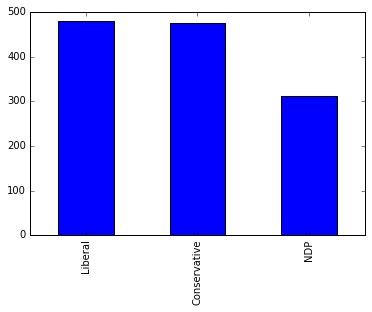

In [57]:
#Snippet to plot the histogram for no of tweets corresponding to respective parties
import matplotlib
%matplotlib inline
unclass['Party'].value_counts().plot(kind='bar')

In [58]:
#snippet to realise the summarised values of the no of tweets to the political parties, As we can see total tweets corresponding
#to the three parties are 1273, however the total tweets in classified data are more than 3000. This huge difference could be 
#because of inefficiency creating a comprehensive list or unrecognized hashtags
unclass['Party'].value_counts()

Liberal         479
Conservative    476
NDP             313
Name: Party, dtype: int64

#### Histogram for Unclassified_tweets

In [39]:
# Reading classified file using pandas as dataframe 
classifi = pd.read_csv('classified_tweets.txt', header = 0, names = ["class1", "id", "date", "query", "user", "text"])

In [ ]:
#Note for TA: I was able to run this code only once, there after each time I run this code its take really long time
#and never seem to render results, This histogram and the values listed below are the values obtained during the first iteration.

#Same logic used as used for unclassified tweets, 
#However due to huge quantity of tweets classified file, computation time was high
prty = []
for line in classifi["text"]:
    prty.append(party(line))
party = pd.DataFrame({"Party": prty})
classifiedtwt = party[party.Party.str.contains("Others") == False]

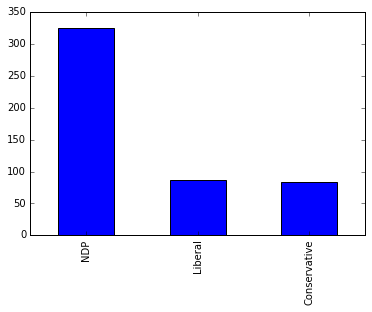

In [12]:
#Snippet to plot the histogram for no of tweets corresponding to respective parties
classifiedtwt['Party'].value_counts().plot(kind='bar')

In [14]:
# number of tweets in each category (party) in classified file
classifiestwt['Party'].value_counts()

NDP             325
Liberal          86
Conservative     84
Name: Party, dtype: int64

## Q3 Model Preparation 


In [14]:
#Classified file has been converted to data frame and required data (feature and target) has been extracted as X and y
import pandas as pd
ctw=pd.read_csv('classified_tweets.txt', header=0, names=['class1', 'id', 'date', 'query', 'user', 'text'])
X = ctw.text
y = ctw.class1
# examine the class distribution
ctw.class1.value_counts()

4    100000
0    100000
Name: class1, dtype: int64

In [15]:
# split X and y into training(70%) and testing sets(30%) using sklearn and the data size has been printed to verify the correctness
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140000,)
(60000,)
(140000,)
(60000,)


In [16]:
#Since the regression models require numbers to be feed as feature vector, we need to convert the text data to numeric data.
# The target vector is already numeric, we convert the text to numeric data by using vectorizer.
from sklearn.feature_extraction.text import CountVectorizer
#Vectoriszer can be tunned to reduce the noise in the given data set, 
#but we peoceed with only two features and remaining are set to default
vect = CountVectorizer( analyzer = 'word',lowercase = True,)

In [17]:
# learn training data vocabulary, then use it to create a document-term matrix, the shape of document term matrix of test data should be same as training set
X_train_dtm = vect.fit_transform(X_train)
#examine the document-term matrix
X_train_dtm

<140000x115482 sparse matrix of type '<class 'numpy.int64'>'
	with 1660867 stored elements in Compressed Sparse Row format>

In [18]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
# examine the document-term matrix
X_test_dtm

<60000x115482 sparse matrix of type '<class 'numpy.int64'>'
	with 678350 stored elements in Compressed Sparse Row format>

## Q4 Evaluating Model

In [26]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [27]:
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

CPU times: user 12.5 s, sys: 0 ns, total: 12.5 s
Wall time: 40.6 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [29]:
# calculate accuracy which in our case comes to 78.82%, 
#Our model may not as accurate as the machinelarning model because logistic regession has been perdormed on the raw data,
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.78820000000000001

In [30]:
#we read the unclassified data  as dataframe to predict the values of the tweets
unctw = pd.read_table('unclassified_tweets.txt', header = None, names = ["text"])
unctw.head()   

,text
0,﻿living the dream. #cameraman #camera #camerac...
1,justin #trudeau's reasons for thanksgiving. to...
2,@themadape butt…..butt…..we’re allergic to l...
3,2 massive explosions at peace march in #turkey...
4,#mulcair suggests there’s bad blood between hi...


In [31]:
#Vectorize the feature vector to obtain numeric data
UCX_dtm = vect.transform(unctw.text)
UCX_dtm

<3026x115482 sparse matrix of type '<class 'numpy.int64'>'
	with 28871 stored elements in Compressed Sparse Row format>

In [32]:
#predict the sentiment of the tweet
UCy = logreg.predict(UCX_dtm)
   
# print tweets and their sentiment values for unclassified file
for text, class1 in zip(unctw.text, UCy):
    print (class1, text)

0 ﻿living the dream. #cameraman #camera #cameraception #camera #cameras #marriott #feet #tommulcair… instagram.com/p/8up9qepkxw/ 
4 justin #trudeau's reasons for thanksgiving. today's montreal@themoment blog at bit.ly/1jqkfwr  #elxn42 poll #quebec #montreal
4 @themadape   butt…..butt…..we’re allergic to latex! makes us sneeze this in #nbpoli #cdnpoli pic.twitter.com/ta0llla4jk
4 2 massive explosions at peace march in #turkey. 30 killed. turkey continues to implode in violence. #cdnpoli twitter.com/telegraph/status/652800836720922624 …
4 #mulcair suggests there’s bad blood between him and #trudeau worldwideherald.com/bammt  #ready4change #ndp pic.twitter.com/zgxmwo2gjk
4 #polqc on se sort de la marde avec #harper et prêt à y retourner avec #trudeau? #polcan
4 harper gave $8m to help other countries' get right wing govt's elected.  boingboing.net/2015/10/09/canadian-tories-funneled-8m-i.html … #cdnpoli #elxn42 @pnpcbc @cbcnews
4 tommy taylor added,
4 @justintrudeau? @thomasmulcair
4 trac

## Q5 Disscussion

In [33]:
# Analysis of results

# Snippet to append predicted sentiment to the he parties and corresponding sentiment values for unclassified tweets
infy = len(UCy)
l1 = []
l2 = []
l3 = []
for i in range(0,infy):   
    l1.append(UCy[i])
    a=party(unctw.text[i])
    l2.append(unctw.text[i])
    l3.append(a)

# Create data frame 
Analysis1 = pd.DataFrame({"Sentiment": l1,"Party": l3,  "Text": l2})
Analysis = Analysis1[Analysis1.Party.str.contains("Other") == False]

Analysis.head()  # showing 1st 5 entries of the table


,Party,Sentiment,Text
0,NDP,0,﻿living the dream. #cameraman #camera #camerac...
1,Liberal,4,justin #trudeau's reasons for thanksgiving. to...
4,NDP,4,#mulcair suggests there’s bad blood between hi...
6,Conservative,4,harper gave $8m to help other countries' get r...
10,Liberal,4,icymi: @lylegreg is predicting a @liberal_part...


In [34]:
# Summary of table
Analysis.pivot_table(index='Sentiment', columns='Party', 
                        aggfunc=len, fill_value=0)

Text             
Party     Conservative Liberal  NDP
Sentiment                          
0                  146     137   73
4                  323     336  236

### Naive Bayes Model

In [35]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

CPU times: user 68 ms, sys: 4 ms, total: 72 ms
Wall time: 262 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [37]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.76991666666666669

In [38]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[24585,  5302],
       [ 8503, 21610]])